In [3]:
import numpy as np #科学计算库
import matplotlib.pyplot as plt #绘图工具
import pandas as pd #txt csv 转成表格
import seaborn as sns #可视化工具
from sklearn.model_selection import train_test_split #原始数据加 划分 “训练集”和“测试集”

# 用于jupyter中进行绘图
%matplotlib inline

In [6]:
fruit_df = pd.read_table("fruit_data_with_colors.txt")
fruit_df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [7]:
print("样本个数：",len(fruit_df))

样本个数： 59


In [8]:
# 创建目标标签和名称的字典  #zip 拉链函数   https://www.runoob.com/python/python-func-zip.html
fruit_name_dict = dict(zip(fruit_df["fruit_label"],fruit_df["fruit_name"]))

In [9]:
print(fruit_name_dict)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [11]:
# 划分数据集
x = fruit_df[["mass","width","height","color_score"]]
y = fruit_df["fruit_label"]

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/4,random_state = 0)

"""
这里的random_state就是为了保证程序每次运行都分割一样的训练集和测试集。否则，同样的算法模型在不同的训练集和测试集上的效果不一样。

当你用sklearn分割完测试集和训练集，确定模型和初始参数以后，你会发现程序每运行一次，都会得到不同的准确率，无法调参。
这个时候就是因为没有加random_state。加上以后就可以调参了。
"""

In [15]:
print("数据集样本数：{}，训练集样本数：{}，测试集样本数：{}".format(len(x),len(x_train),len(x_test)))

数据集样本数：59，训练集样本数：44，测试集样本数：15


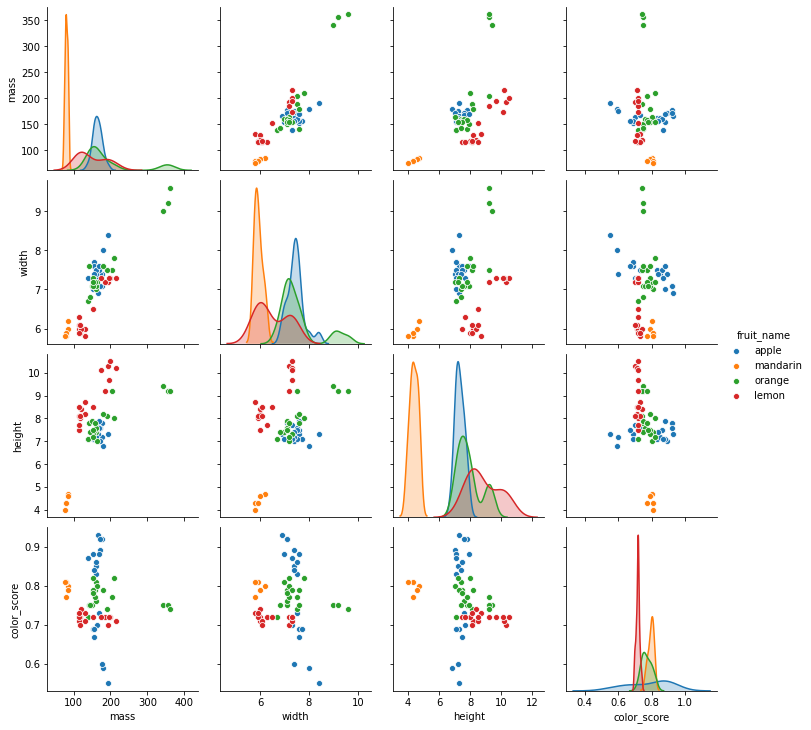

In [18]:
# 查看数据集
sns.pairplot(data = fruit_df, hue = "fruit_name", vars = ["mass","width","height","color_score"])

"""
https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://www.lizenghai.com/archives/65461.html
https://www.jianshu.com/p/6e18d21a4cad
"""

In [19]:
# 用于jupyter中进行绘图
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

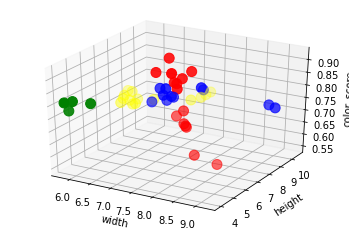

In [27]:
label_color_dict = {1:"red",2:"green",3:"blue",4:"yellow"}
colors = list(map(lambda label:label_color_dict[label],y_train))

fig = plt.figure() #画板，初始化图像
ax = fig.add_subplot(111,projection = "3d") # 几行几列第几个子图
ax.scatter(x_train["width"],x_train["height"],x_train["color_score"],c = colors, marker = 'o',s = 100)
ax.set_xlabel("width")
ax.set_ylabel("height")
ax.set_zlabel("color_score")
plt.show()

In [31]:
#建立（选择）模型
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [45]:
#训练模型
knn=KNeighborsClassifier(n_neighbors=5)

In [46]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
y_pred = knn.predict(x_test) # 测试模型

In [48]:
print(y_pred)

[3 1 4 4 1 1 3 3 1 4 2 1 3 1 4]


In [51]:
from sklearn.metrics import accuracy_score
import ml_visualization

acc = accuracy_score(y_test,y_pred)
print("准确率：",acc)

准确率： 0.26666666666666666


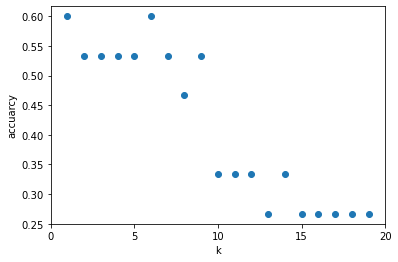

In [69]:
#建立knn模型
acc_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
#训练模型
    knn.fit(x_train,y_train)
#预测
    y_pred=knn.predict(x_test)
# print('y_pred=',y_pred)
# print('y_test=\n',y_test)
    acc=accuracy_score(y_test,y_pred)
    acc_scores.append(acc)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuarcy')
#plt.plot(acc_scores,marker='o')
plt.scatter(range(1,20),acc_scores)
plt.xticks([0,5,10,15,20])
plt.show()

# ml_visualization.plot_fruit_knn(x_train,y_train,5)

In [76]:
# 只查看width和height 两列特征
from ml_visualization import plot_fruit_knn

In [77]:
plot_fruit_knn(x_train,y_train,1)
plot_fruit_knn(x_train,y_train,5)
plot_fruit_knn(x_train,y_train,10)

AttributeError: 'DataFrame' object has no attribute 'as_matrix'